# Heart Failure Prediction

## Data Description

Data Source: [Kaggle](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)

| **Column Name**               | **Description**                                                                 |
| ----------------------------- | ------------------------------------------------------------------------------- |
| age                           | Age                                                                             |
| anaemia                       | Decrease of red blood cells or hemoglobin (boolean)                             |
| creatinine_phosphokinase      | Level of the CPK enzyme in the blood (mcg/L)                                    |
| diabetes                      | If the patient has diabetes (boolean), 0 = No, 1 = Yes                          |
| ejection_fraction             | Percentage of blood leaving the heart at each contraction (percentage)          |
| high_blood_pressure           | If the patient has hypertension (boolean), 0 = No, 1 = Yes                      |
| platelets                     | Platelets in the blood (kiloplatelets/mL)                                       |
| serum_creatinine              | Level of serum creatinine in the blood (mg/dL)                                  |
| serum_sodium                  | Level of serum sodium in the blood (mEq/L)                                      |
| sex                           | Woman = 0, man = 1                                                              |
| smoking                       | If the patient smokes or not (boolean), 0 = No, 1 = Yes                         |
| time                          | Follow-up period (days)                                                         |
| DEATH_EVENT                   | If the patient deceased during the follow-up period (boolean), 0 = No, 1 = Yes  |



## 1. Import Libraries

In [1]:
import pandas as pd # Data manipulation and analysis

import sklearn # Building and evaluating ML models

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load and Analyze Data

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.shape

(299, 13)

## 3. Exploratory Data Analysis
This is performed to understand the distribution of features, check for missing values, and gain insights into our data

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
# Check if any columns contain null values
df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

### Visualization
#### Gender Distribution

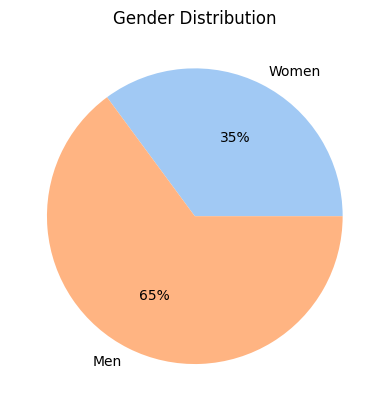

In [7]:
# Extract sex and death_event columns
genders = df['sex']
deaths = df['DEATH_EVENT']

# Calculate male and female counts
male_count = genders[genders == 1].count()
female_count = genders[genders == 0].count()
        
# declaring data
fields = [female_count, male_count]
keys = ['Women', 'Men']
  
# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
  
# plotting data on chart
plt.pie(fields, labels=keys, colors=palette_color, autopct='%.0f%%')

# Adding a title
plt.title('Gender Distribution')
  
# displaying chart
plt.show()

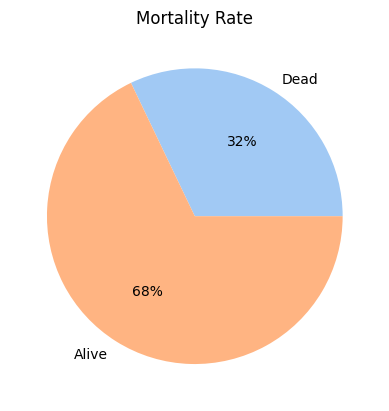

In [8]:
dead = deaths[deaths == 1].count()
alive = deaths[deaths == 0].count()
        
# declaring data
fields2 = [dead, alive]
keys2 = ['Dead', 'Alive']
  
# plotting data on chart
plt.pie(fields2, labels=keys2, colors=palette_color, autopct='%.0f%%')

# Adding a title
plt.title('Mortality Rate')
  
# displaying chart
plt.show()

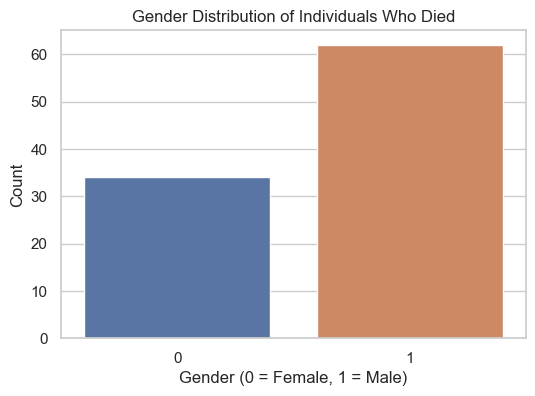

In [9]:
# Filter the dataset for individuals who died (DEATH_EVENT = 1)
died_data = df[df['DEATH_EVENT'] == 1]

# Create a countplot for mortality rates by gender for individuals who died
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
sns.countplot(x='sex', data=died_data)
plt.title('Gender Distribution of Individuals Who Died')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

## 4. Machine Learning
### 4.1. Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

features = df.drop('DEATH_EVENT', axis=1)
target = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### 4.2. Model Selection
#### Decision Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, criterion="entropy")

# Train the decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [12]:
# Make predictions using the decision tree model
dt_pred = dt.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy_dt = accuracy_score(y_test, dt_pred)
print("Accuracy: ", accuracy_dt)

Accuracy:  0.7166666666666667


#### Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [15]:
# Make predictions using the random forest model
rf_pred = rf.predict(X_test)

In [16]:
accuracy_rf = accuracy_score(y_test, rf_pred)
print("Accuracy: ", accuracy_rf)

Accuracy:  0.7166666666666667


#### K-Nearest Neighbors

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [18]:
# Make predictions using the knn model
knn_pred = knn.predict(X_test)

In [19]:
accuracy_knn = accuracy_score(y_test, knn_pred)
print("Accuracy: ", accuracy_knn)

Accuracy:  0.5833333333333334


#### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [21]:
# Make predictions using the logistics regression model
lr_pred = lr.predict(X_test)

In [22]:
accuracy_lr = accuracy_score(y_test, lr_pred)
print("Accuracy: ", accuracy_lr)

Accuracy:  0.8


In [23]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1)
cb.fit(X_train, y_train)

# Make predictions using the cat boost model
cb_pred = cb.predict(X_test)

accuracy_cb = accuracy_score(y_test, cb_pred)
print("Accuracy: ", accuracy_cb)

0:	learn: 0.6619603	total: 143ms	remaining: 14.2s
1:	learn: 0.6240667	total: 144ms	remaining: 7.07s
2:	learn: 0.5933228	total: 146ms	remaining: 4.7s
3:	learn: 0.5686090	total: 147ms	remaining: 3.52s
4:	learn: 0.5473305	total: 148ms	remaining: 2.81s
5:	learn: 0.5207163	total: 148ms	remaining: 2.32s
6:	learn: 0.5009158	total: 149ms	remaining: 1.98s
7:	learn: 0.4778096	total: 150ms	remaining: 1.72s
8:	learn: 0.4631484	total: 151ms	remaining: 1.52s
9:	learn: 0.4475703	total: 152ms	remaining: 1.36s
10:	learn: 0.4339257	total: 153ms	remaining: 1.24s
11:	learn: 0.4232551	total: 153ms	remaining: 1.13s
12:	learn: 0.4114588	total: 154ms	remaining: 1.03s
13:	learn: 0.3982525	total: 155ms	remaining: 952ms
14:	learn: 0.3879280	total: 156ms	remaining: 882ms
15:	learn: 0.3775062	total: 157ms	remaining: 822ms
16:	learn: 0.3697111	total: 157ms	remaining: 769ms
17:	learn: 0.3641896	total: 159ms	remaining: 722ms
18:	learn: 0.3546971	total: 160ms	remaining: 684ms
19:	learn: 0.3482131	total: 161ms	remainin

## 5. Conclusion

We notice that based on the data, more men suffered from heart diseases than women and men also had a higher mortality rate than the women. Overall, heart disease had a low mortality rate as 68% of the people are still alive.

The Logistic Regression model outperformed the other models with a score of 80%. The accuracy can be increased by increasing the data.

In [24]:
model_score = {'Model': ['Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Logistic Regression', 'Cat Boost'],
               'Score': [accuracy_dt, accuracy_rf, accuracy_knn, accuracy_lr, accuracy_cb]}

table = pd.DataFrame(model_score)
table

,Model,Score
0,Decision Tree,0.716667
1,Random Forest,0.716667
2,K-Nearest Neighbors,0.583333
3,Logistic Regression,0.800000
4,Cat Boost,0.733333
